In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Carga de dataset
data = pd.read_csv('/content/covid.csv')

In [4]:
print(data)

     SR.No     Country/other  Total_cases  Total_deaths  Total_recovered  \
0        1               USA    107715650       1171803        105773383   
1        2             India     44996198        531920         44462773   
2        3            France     40138560        167642         39970918   
3        4           Germany     38428685        174352         38240600   
4        5            Brazil     37739057        704897         36249161   
..     ...               ...          ...           ...              ...   
225    226              Niue          829             0              825   
226    227  Diamond Princess          712            13              699   
227    228           Tokelau           80             0                0   
228    229      Vatican City           29             0               29   
229    230    Western Sahara           10             1                9   

     Active_cases  Serious_cases  Total_tests  Population  
0          770464          

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SR.No            230 non-null    int64 
 1   Country/other    230 non-null    object
 2   Total_cases      230 non-null    int64 
 3   Total_deaths     230 non-null    int64 
 4   Total_recovered  230 non-null    int64 
 5   Active_cases     230 non-null    int64 
 6   Serious_cases    230 non-null    int64 
 7   Total_tests      230 non-null    int64 
 8   Population       230 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 16.3+ KB


In [6]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [7]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [8]:
#resultado
print(data)

     SR.No  Country/other  Total_cases  Total_deaths  Total_recovered  \
0        1            216    107715650       1171803        105773383   
1        2             94     44996198        531920         44462773   
2        3             72     40138560        167642         39970918   
3        4             78     38428685        174352         38240600   
4        5             26     37739057        704897         36249161   
..     ...            ...          ...           ...              ...   
225    226            151          829             0              825   
226    227             56          712            13              699   
227    228            207           80             0                0   
228    229            222           29             0               29   
229    230            226           10             1                9   

     Active_cases  Serious_cases  Total_tests  Population  
0          770464            894   1181246915   334805269  
1  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   SR.No            230 non-null    int64
 1   Country/other    230 non-null    int64
 2   Total_cases      230 non-null    int64
 3   Total_deaths     230 non-null    int64
 4   Total_recovered  230 non-null    int64
 5   Active_cases     230 non-null    int64
 6   Serious_cases    230 non-null    int64
 7   Total_tests      230 non-null    int64
 8   Population       230 non-null    int64
dtypes: int64(9)
memory usage: 16.3 KB


In [11]:
# Lectura de Datos
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [12]:
print(X)
print('*'*25)
print(y)

     SR.No  Country/other  Total_cases  Total_deaths  Total_recovered  \
0        1            216    107715650       1171803        105773383   
1        2             94     44996198        531920         44462773   
2        3             72     40138560        167642         39970918   
3        4             78     38428685        174352         38240600   
4        5             26     37739057        704897         36249161   
..     ...            ...          ...           ...              ...   
225    226            151          829             0              825   
226    227             56          712            13              699   
227    228            207           80             0                0   
228    229            222           29             0               29   
229    230            226           10             1                9   

     Active_cases  Serious_cases  Total_tests  
0          770464            894   1181246915  
1            1505          

In [13]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [14]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     SR.No  Country/other  Total_cases  Total_deaths  Total_recovered  \
0        1            216    107715650       1171803        105773383   
1        2             94     44996198        531920         44462773   
2        3             72     40138560        167642         39970918   
3        4             78     38428685        174352         38240600   
4        5             26     37739057        704897         36249161   
..     ...            ...          ...           ...              ...   
225    226            151          829             0              825   
226    227             56          712            13              699   
227    228            207           80             0                0   
228    229            222           29             0               29   
229    230            226           10             1                9   

     Active_cases  Serious_cases  Total_tests  
0          770464            894   1181246915  
1            1505          

In [15]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [16]:
print(X)

[[ 1.         -1.72453645  1.52873755 ...  5.63535698  8.21065568
  10.01249295]
 [ 1.         -1.709475   -0.3087598  ... -0.23030223 -0.27441755
   7.83349882]
 [ 1.         -1.69441354 -0.64011178 ... -0.24178245  7.97337734
   2.09728846]
 ...
 [ 1.          1.69441354  1.39318447 ... -0.24117221 -0.27441755
  -0.26477197]
 [ 1.          1.709475    1.61910628 ... -0.24178245 -0.27441755
  -0.26477197]
 [ 1.          1.72453645  1.67935209 ... -0.24178245 -0.27441755
  -0.26477197]]


In [17]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [18]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 33911780.45309711  -9283971.17695422 -11970007.79564529
  -1547070.4762092   17205394.11160015  -3402595.52243001
  -1645088.21675662 -26829575.5338893   68142055.08125903]
El valor predecido es (usando el descenso por el gradiente): 25938903.3568


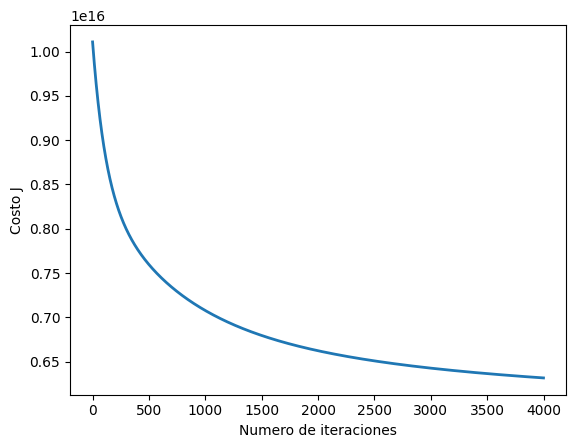

In [19]:
# Elegir algun valor para alpha (probar varias alternativas mejores alfas = 0.1, 0.01, 0.001, 0.0001)
alpha = 0.001
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 2, 130, 32, 1, 17, 1.48, 29, 4]
X_array[1:9] = (X_array[1:9] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [21]:
X_array = [1, 2, 130, 32, 1, 17, 1.48, 29, 4]
X_array[1:9] = (X_array[1:9] - mu) / sigma

In [22]:
X_array[1:9]

[-1.7094749981986697,
 0.23345253279365094,
 -0.3085334955853312,
 -0.2817552297323368,
 -0.2902881303097325,
 -0.24177116015920477,
 0.000825315944903932,
 -0.26477193037954005]

In [23]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [30]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [34]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar datos para covid

X_array = [1, 1, 128, 33, 2, 17, 1.8, 28, 4]
price = np.dot(X_array, theta)

print('datos de covid en tiempo real(usando la ecuación de la normal): ${:.0f}'.format(price))

LinAlgError: ignored